In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

# PaNOSC EOSC Data analysis (of EU population migration in 2017)

Instructions:

- This notebook contains a basic analysis of the data set. You can browse the outputs below.

- You can also re-execute the notebook (either use the menu entries, or press SHIFT+RETURN to execute one cell at the time).

- You can also modify all lines and re-execute to extend the given study for your research needs.

## Step 1: fetch the data [to be resolved - WP3 / WP4 / WP6 / EGI]

In [2]:
!wget https://fangohr.github.io/data/eurostat/population2017/eu-pop-2017.csv

--2019-06-19 19:14:48--  https://fangohr.github.io/data/eurostat/population2017/eu-pop-2017.csv
Resolving fangohr.github.io... 185.199.108.153, 185.199.110.153, 185.199.109.153, ...
Connecting to fangohr.github.io|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1087 (1.1K) [text/csv]
Saving to: ‘eu-pop-2017.csv.2’

eu-pop-2017.csv.2   100%[===================>]   1.06K  --.-KB/s    in 0s      

2019-06-19 19:14:48 (31.4 MB/s) - ‘eu-pop-2017.csv.2’ saved [1087/1087]



## Step 2: offer some analysis. Here: Deriving estimate of migration in 2017, and plot

### Open the data

In [3]:

import pandas as pd
df = pd.read_csv("eu-pop-2017.csv", index_col=['geo'])

In [4]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df.head()

,pop17,pop18,births,deaths
geo,,,,
Belgium,11351727,11413058,119690,109666
Bulgaria,7101859,7050034,63955,109791
Czechia,10578820,10610055,114405,111443
Denmark,5748769,5781190,61397,53261
Germany,82521653,82850000,785000,933000


## Population change per country in 2017 

In [6]:
df['natural-change'] = df['births'] - df['deaths']

df['change'] = df['pop18'] - df['pop17']

df.head()

,pop17,pop18,births,deaths,natural-change,change
geo,,,,,,
Belgium,11351727,11413058,119690,109666,10024,61331
Bulgaria,7101859,7050034,63955,109791,-45836,-51825
Czechia,10578820,10610055,114405,111443,2962,31235
Denmark,5748769,5781190,61397,53261,8136,32421
Germany,82521653,82850000,785000,933000,-148000,328347


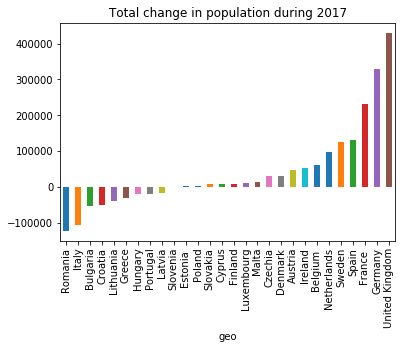

In [7]:
ax = df['change'].sort_values().plot(kind='bar')
ax.set_title("Total change in population during 2017");

With that information, we can estimate migration. (It is important to note that this estimated number will also absorb all inaccuracies or changes of the data gathering method, in the original data described as "statistical adjustment".)

In [8]:
df['migration'] = df['change'] - df['natural-change']

In [9]:
df.head()

,pop17,pop18,births,deaths,natural-change,change,migration
geo,,,,,,,
Belgium,11351727,11413058,119690,109666,10024,61331,51307
Bulgaria,7101859,7050034,63955,109791,-45836,-51825,-5989
Czechia,10578820,10610055,114405,111443,2962,31235,28273
Denmark,5748769,5781190,61397,53261,8136,32421,24285
Germany,82521653,82850000,785000,933000,-148000,328347,476347


Let's plot the total change of the population per country in the top subfigure, and the contribution from natural changes and migration in the lower subfigure:

## Origins of population changes in 2017

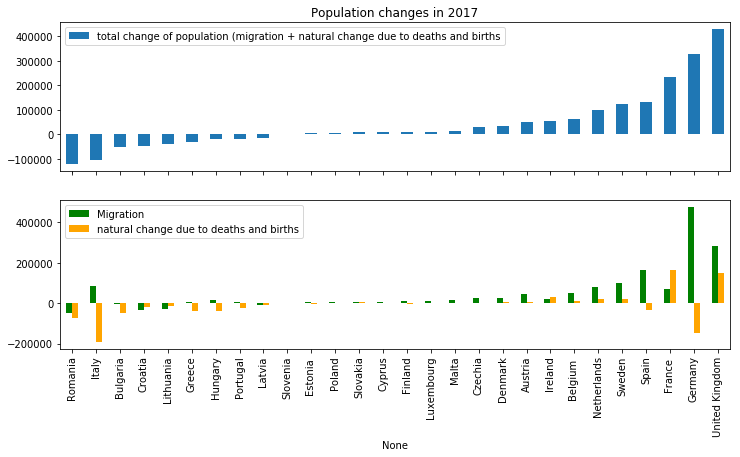

In [10]:
tmp = df.sort_values(by='change')
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

tmp.plot(kind='bar', y=['change'], sharex=True, ax=axes[0])
axes[0].set_title("Population changes in 2017")
axes[0].legend(['total change of population (migration + '\
                'natural change due to deaths and births'])
tmp.plot(kind='bar', y=['migration', 'natural-change'], 
         sharex=True, ax=axes[1], color=['green', 'orange'])
axes[1].legend(['Migration', "natural change due to deaths and births"])
axes[1].set_xlabel(None);

Lower plot: orange bars show changes due to death and birth rates in each country, green bars indicate migration.

## Step 3: Download (or make persistent) the modified analysis

If the user has modified the enough analysis, then it may be worth preserving this. This can be done by

- downloading the notebook (go to `File -> Download as -> `)
  - select `Notebook (.ipynb)` to obtain this document, which can be re-executed in the future
  - select `HTML` or `pdf` for a read-only version of this document.
  
In the future, it may be possible to 

- save this file into your personal space in the EOSC

- make this file available together with the data set




----------

**Book keeping: which software do we use?**

In [11]:
import sys; print(sys.version)
import pandas as pd; print(f"pandas: {pd.__version__}")
import matplotlib as mpl; print(f"matplotlib: {mpl.__version__}")
import numpy as np; print(f"numpy: {np.__version__}")



3.6.7 | packaged by conda-forge | (default, Feb 28 2019, 02:16:08) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
pandas: 0.23.1
matplotlib: 2.2.2
numpy: 1.15.1
